In [1]:
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
ppi_df <- read_tsv('../../data/4.data//ppi.tsv.xz')

head(ppi_df, 2)

Parsed with column specification:
cols(
  name_a = col_character(),
  name_b = col_character(),
  id_a = col_integer(),
  id_b = col_integer(),
  train = col_integer(),
  test_recon = col_integer(),
  test_new = col_integer(),
  edge_prior = col_double(),
  rwr = col_double(),
  mean_rwr = col_double(),
  p_rwr = col_double(),
  jaccard = col_double(),
  mean_jaccard = col_double(),
  p_jaccard = col_double()
)


name_a,name_b,id_a,id_b,train,test_recon,test_new,edge_prior,rwr,mean_rwr,p_rwr,jaccard,mean_jaccard,p_jaccard
A0A087WT00,A0A087WT00,0,0,0,0,0,0,2.516038e-01,0.2512483655,0.038,1,1.000000000,1
A0A087WT00,A0A0B4J1W7,0,1,0,0,0,0,1.582702e-05,0.0000145586,0.088,0,0.001491855,1


In [3]:
vis_df <- ppi_df %>%
    sample_n(20000) %>%
    gather('feature', 'feature_value', edge_prior:p_jaccard) %>%
    gather('network', 'edge', train:test_new) %>%
    mutate(
        feature = factor(feature, levels=c('edge_prior', 'jaccard', 'mean_jaccard', 'p_jaccard',
                                                'rwr', 'mean_rwr', 'p_rwr')),
        network = network %>% factor(levels=c('train', 'test_recon', 'test_new'))
    )

head(vis_df, 2)

name_a,name_b,id_a,id_b,feature,feature_value,network,edge
Q8TC57,Q9H1Q7,2538,3361,edge_prior,0.000,train,0
P60981,P78310,1239,1333,edge_prior,0.034,train,0


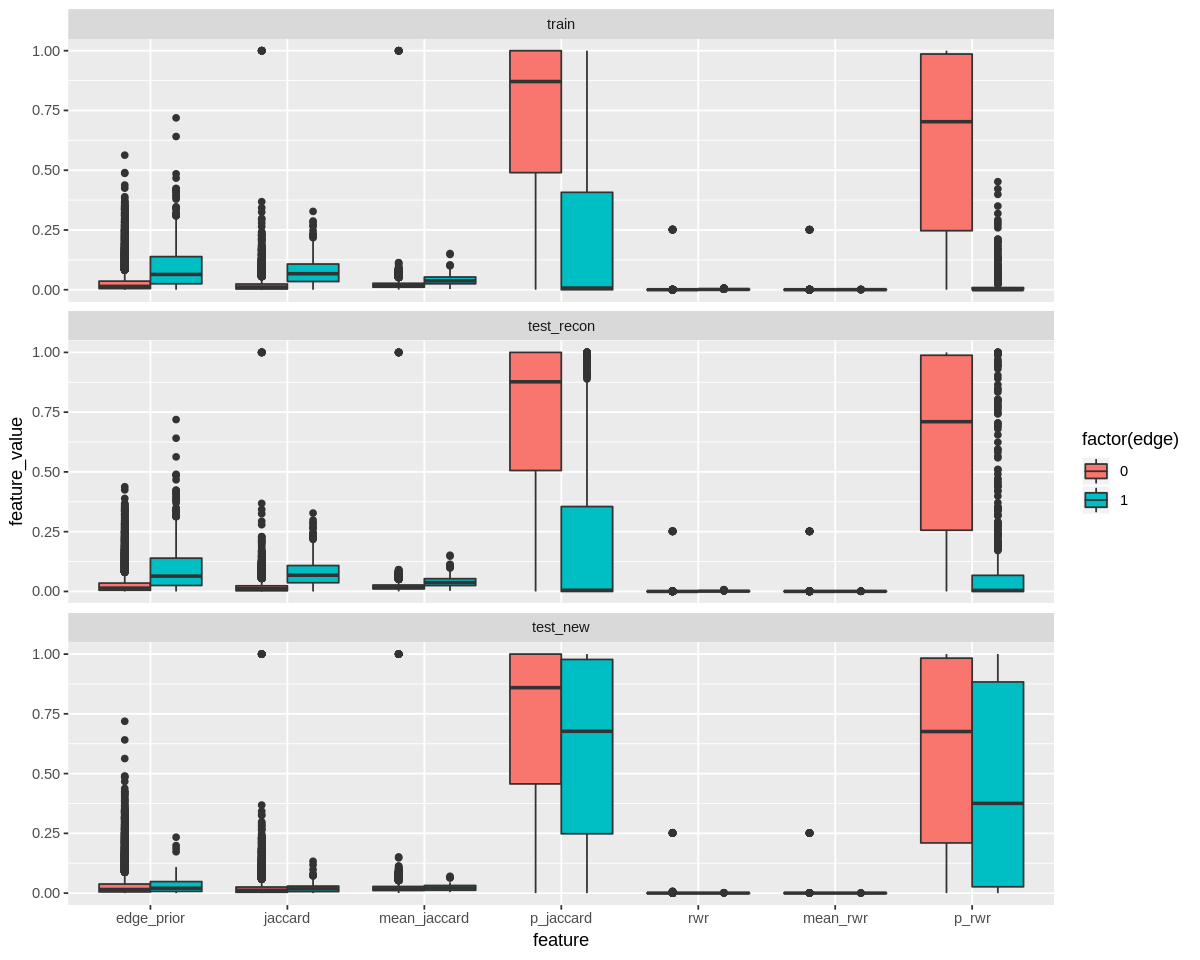

In [4]:
options(repr.plot.width=10, repr.plot.height=8)

img <- (
    ggplot(vis_df, aes(x = feature, y = feature_value, fill = factor(edge)))
    + geom_boxplot(position = 'dodge')
    + facet_wrap('network', ncol = 1)
)

ggsave(plot = img, filename = '../../img/edge_vs_no_edge_features.png', dpi = 500,
      height = 8, width = 10)
img